# Pandas Time Series II

## Compare the performance of several asset classes

We can easily compare several time series by normalizing their starting points to 100, and plot the result. To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
SP500    2469 non-null float64
Bonds    2469 non-null float64
Gold     2469 non-null float64
Oil      2469 non-null float64
dtypes: float64(4)
memory usage: 96.4 KB
None


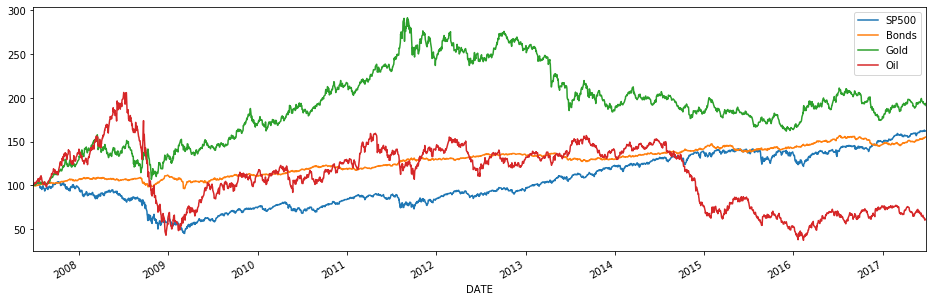

In [2]:
# Import data here
prices = pd.read_csv('data/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot(figsize=(16, 5))
plt.show()

## Comparing stock prices with a benchmark

Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

The three largest companies on the NYSE are:

|Company | Stock Ticker|
|--------|-------------|
|Johnson & Johnson	| JNJ|
|Exxon Mobil | XOM|
|JP Morgan Chase | JPM|

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
JNJ     1762 non-null float64
JPM     1762 non-null float64
XOM     1762 non-null float64
DJIA    1762 non-null float64
dtypes: float64(4)
memory usage: 68.8 KB
None


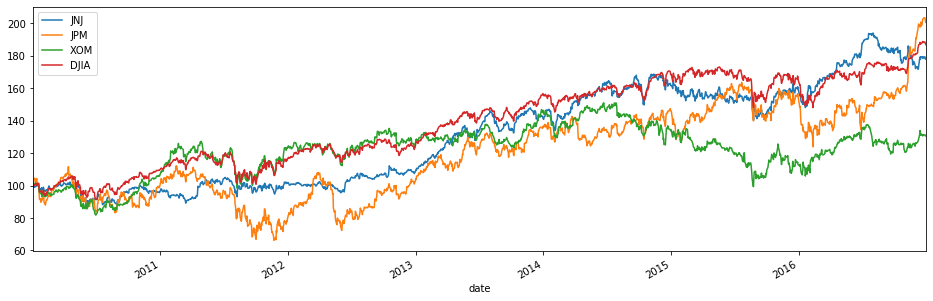

In [3]:
# Import stock prices and index here
stocks = pd.read_csv('data/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('data/dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot(figsize=(16, 5))
plt.show()

## Plot performance difference vs benchmark index


Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

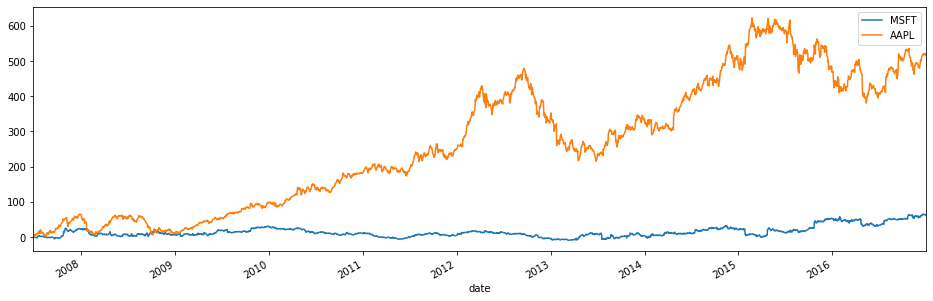

In [4]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('data/msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('data/sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot(figsize=(16, 5))
plt.show()

## Convert monthly to weekly data

Let's practice by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

In [5]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start, end, freq='M')

# Create and print monthly here
monthly = pd.Series([1, 2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start, end, freq='W')

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64


Print monthly, reindexed using weekly_dates

In [6]:
monthly.reindex(weekly_dates).to_frame()

,0
2016-01-03,NaN
2016-01-10,NaN
2016-01-17,NaN
2016-01-24,NaN
2016-01-31,1.0
2016-02-07,NaN
2016-02-14,NaN
2016-02-21,NaN
2016-02-28,NaN


In [7]:
monthly.reindex(weekly_dates, method='bfill').to_frame()

,0
2016-01-03,1
2016-01-10,1
2016-01-17,1
2016-01-24,1
2016-01-31,1
2016-02-07,2
2016-02-14,2
2016-02-21,2
2016-02-28,2


In [8]:
monthly.reindex(weekly_dates, method='ffill').to_frame()

,0
2016-01-03,NaN
2016-01-10,NaN
2016-01-17,NaN
2016-01-24,NaN
2016-01-31,1.0
2016-02-07,1.0
2016-02-14,1.0
2016-02-21,1.0
2016-02-28,1.0


## Create weekly from monthly unemployment data

The civilian US unemployment rate is reported monthly. You may need more frequent data, but that's no problem because we can upsampling a time series.

We'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

            unemployment
date                    
2000-01-02           NaN
2000-01-09           NaN
2000-01-16           NaN
2000-01-23           NaN
2000-01-30           NaN
            unemployment
date                    
2000-01-02           4.1
2000-01-09           4.1
2000-01-16           4.1
2000-01-23           4.1
2000-01-30           4.1
            unemployment
date                    
2000-01-02           4.0
2000-01-09           4.0
2000-01-16           4.0
2000-01-23           4.0
2000-01-30           4.0


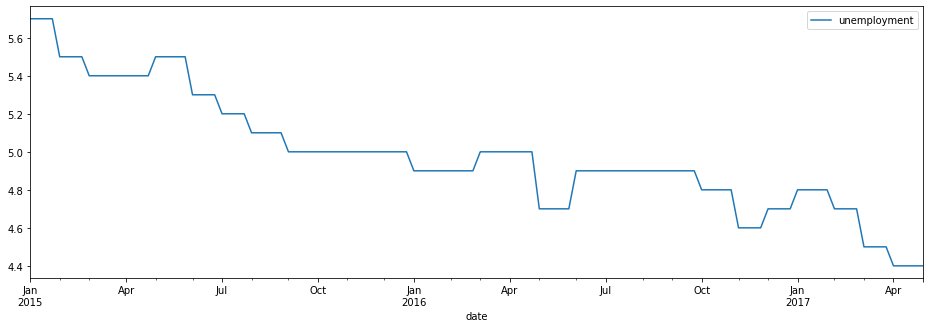

In [9]:
# Import data here
data = pd.read_csv('data/unemployment.csv', parse_dates=['date'], index_col='date')

# Show first five rows of weekly series
print(data.asfreq('W').head(5))

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head(5))

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head(5))

# Plot weekly_fill starting 2015 here 
weekly_ffill['2015':].plot(figsize=(16, 5))
plt.show()

## Use interpolation to create weekly employment data


You have recently used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple forward or backfill methods.

Compare your previous approach to the new .interpolate() method that you learned about in this video.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
UNRATE    85 non-null float64
dtypes: float64(1)
memory usage: 1.3 KB
None


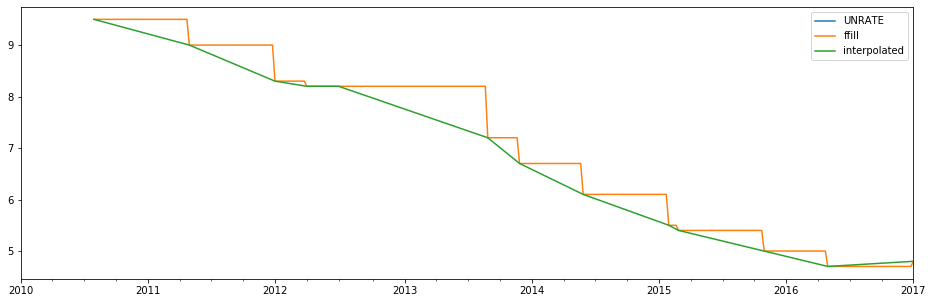

In [10]:
# Import data here
data = pd.read_csv('data/monthly.csv', sep=',', parse_dates=['date'], index_col='date')

print(data.info())

# Create weekly dates
weekly_dates = pd.date_range(start=data.index.min(), end=data.index.max(), freq='W')

# Reindex monthly to weekly data
weekly = data.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly['UNRATE'].ffill()
weekly['interpolated'] = weekly['UNRATE'].interpolate()

# Plot weekly
weekly.plot(figsize=(16, 5))
plt.show()

## Interpolate debt/GDP and compare to unemployment

We can now apply this new skill to the quarterly debt/GDP series, and compare the result to the monthly unemployment rate.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        29 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        89 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None


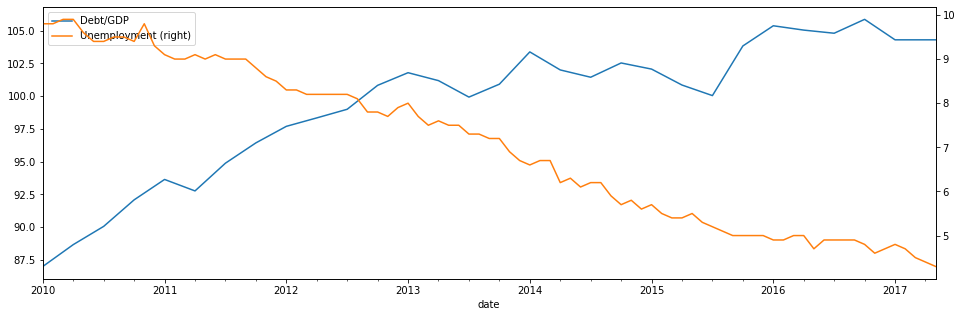

In [11]:
# Import & inspect data here
data = pd.read_csv('data/debt_unemployment.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment', figsize=(16, 5));
plt.show()

## Compare weekly, monthly and annual ozone trends for NYC & LA


We'll see how to downsample and aggregate time series on air quality.

First, we'll apply this new skill to ozone data for both NYC and LA since 2000 to compare the air quality trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
Los Angeles    5488 non-null float64
New York       6167 non-null float64
dtypes: float64(2)
memory usage: 147.4 KB
None


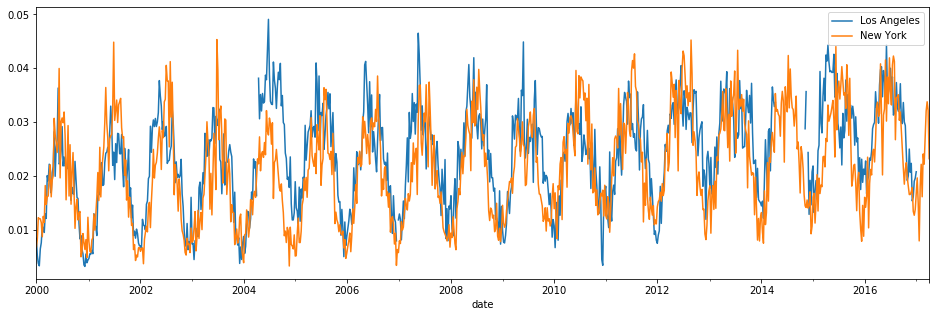

In [12]:
# Import and inspect data here
ozone = pd.read_csv('data/ozone_nyla.csv', parse_dates=['date'], index_col='date')
print(ozone.info())

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot(figsize=(16, 5))
plt.show()

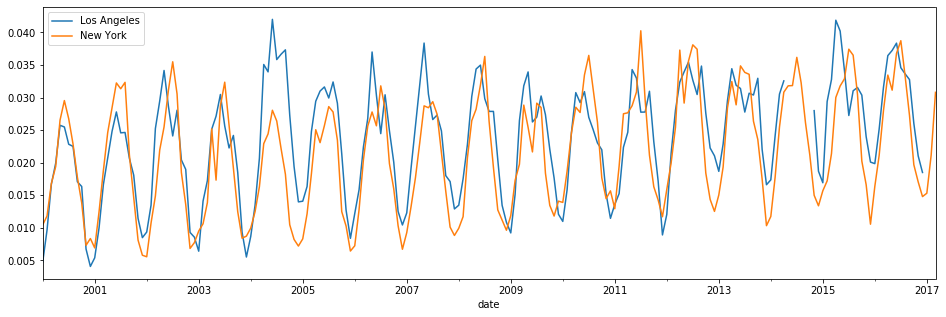

In [13]:
# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot( figsize=(16, 5))
plt.show()

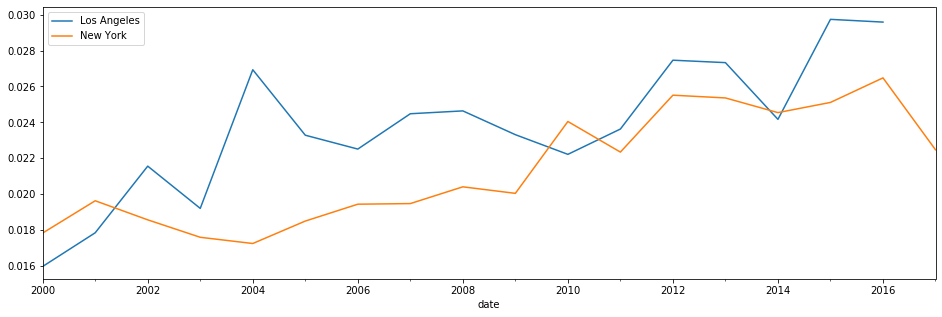

In [14]:
# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot( figsize=(16, 5))
plt.show()

## Compare monthly average stock prices for Facebook and Google

Now, we'll apply a new resampling to daily stock price series for Facebook and Google for the 2015-2016 period to compare the trend of the monthly averages.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
FB      504 non-null float64
GOOG    504 non-null float64
dtypes: float64(2)
memory usage: 11.8 KB
None


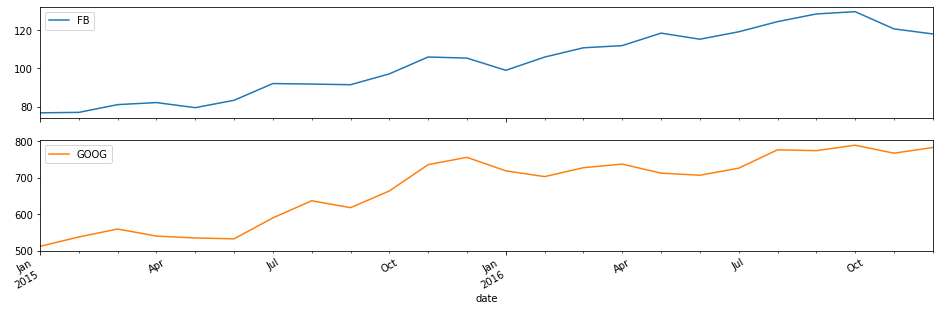

In [15]:
# Import and inspect data here
stocks = pd.read_csv('data/goog_fb.csv', parse_dates=['date'], index_col='date')
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True, figsize=(16, 5));
plt.show();

## Compare quarterly GDP growth rate and stock returns

We can compare higher-frequency stock price series to lower-frequency economic time series.

As a first example, let's compare the quarterly GDP growth rate to the quarterly rate of return on the (resampled) Dow Jones Industrial index of 30 large US stocks.

GDP growth is reported at the beginning of each quarter for the previous quarter. To calculate matching stock returns, you'll resample the stock index to quarter start frequency using the alias 'QS', and aggregating using the .first() observations.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
gdp_growth    41 non-null float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
djia    2519 non-null float64
dtypes: float64(1)
memory usage: 40.8 KB
None


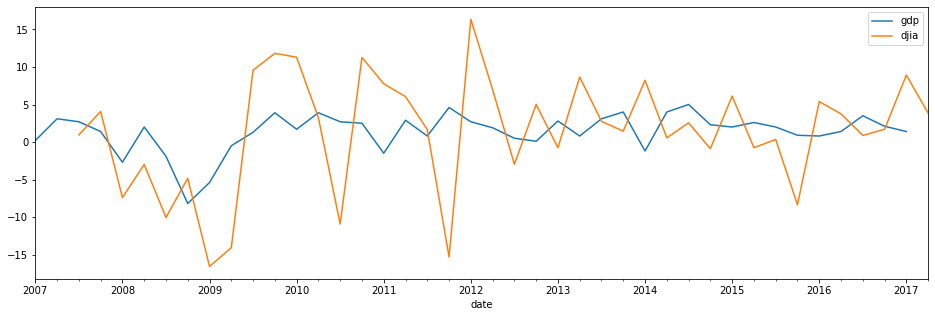

In [16]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('data/gdp_growth.csv', parse_dates=['date'], index_col='date')

print(gdp_growth.info())

# Import and inspect djia here
djia = pd.read_csv('data/djia.csv', parse_dates=['date'], index_col='date')

print(djia.info())

# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']

data.plot(figsize=(16, 5))
plt.show()

## Visualize monthly mean, median and standard deviation of S&P500 returns

Let's use this to explore how the monthly mean, median and standard deviation of daily S&P500 returns have trended over the last 10 years.

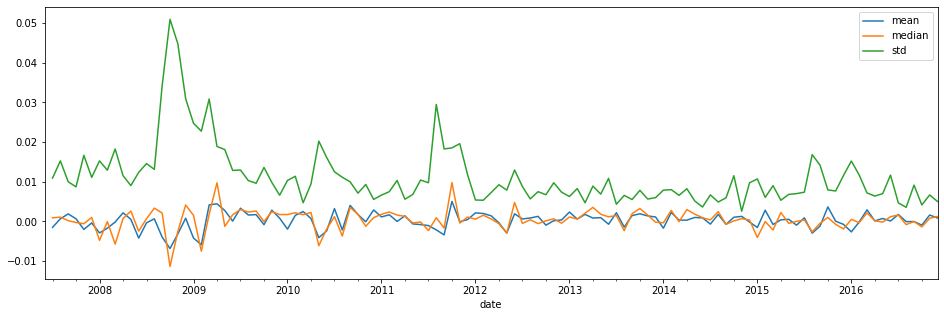

In [17]:
# Import data here
sp500 = pd.read_csv('data/sp500.csv', parse_dates=['date'], index_col='date')

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

# Plot stats here
stats.plot(figsize=(16, 5))
plt.show()